In [46]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt


crop = pd.read_csv("Crop_recommendation.csv")
crop.info()
crop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [47]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [48]:
crop.shape

(2200, 8)

In [49]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [50]:
crop.duplicated().sum()

0

In [51]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [52]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Removing the Non numeric-value

In [53]:
crop_numeric_value = crop.drop(columns="label")

crop_numeric_value.head()


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [54]:
corr = crop_numeric_value.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


### These values represent the degree of correlation between the corresponding variables. Positive values indicate a positive correlation, meaning that as one variable increases, the other tends to increase as well. Negative values indicate a negative correlation, meaning that as one variable increases, the other tends to decrease.

Text(0.5, 1.0, 'Correlation Heatmap')

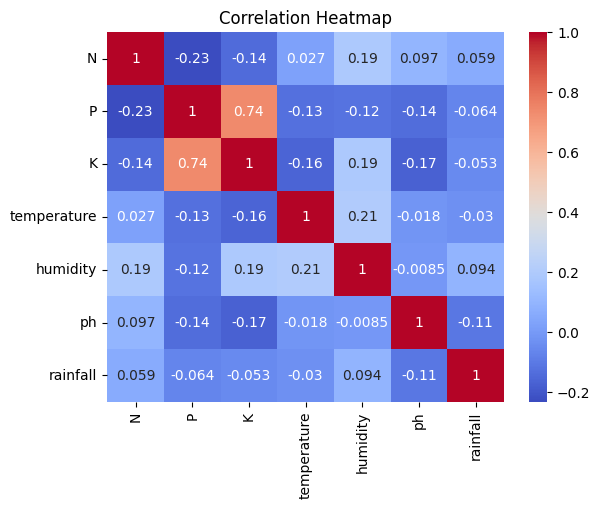

In [55]:
import seaborn as sns
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")

# The range of correlation coefficients observed in the heatmap (-1 to 1).
    The distribution of correlation values (e.g., mostly positive, mostly negative, evenly distributed).
    Any specific high or low correlation values that stand out

# Splitting the dataset using train_test_split

In [56]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
print(features)
target = crop['label']
labels = crop['label']

accuracy = []
mod = []

from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size=0.2,random_state=42)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


In [57]:
copy_crop = crop
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
copy_crop['label_num'] = copy_crop['label'].map(crop_dict)
copy_crop.drop('label',axis=1,inplace=True)
copy_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


Text(0, 0.5, 'labels')

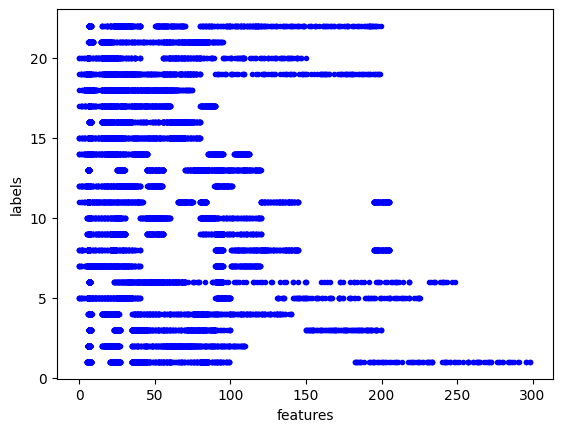

In [58]:
label_num = copy_crop['label_num']
plt.plot(features,label_num,"b.")
plt.xlabel("features")
plt.ylabel("labels")

In [59]:
from sklearn.calibration import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=5)),
 ("svm_clf", LinearSVC(C=15, loss="hinge"))
 ])
polynomial_svm_clf.fit(Xtrain, Ytrain)


c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=5)),
                ('svm_clf', LinearSVC(C=15, loss='hinge'))])

SVM_LinearSVC Accuracy is:  91.36363636363637
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      0.62      0.76        21
   blackgram       0.65      0.85      0.74        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.93      0.96        27
      coffee       0.94      0.94      0.94        17
      cotton       0.88      0.82      0.85        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.83      0.83        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.77      0.91      0.83        11
       maize       0.79      0.90      0.84        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.90      1.00      0.95        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      0.86  

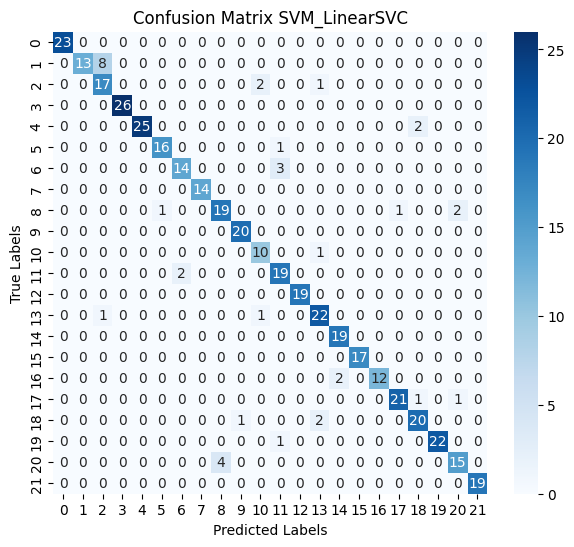

In [60]:
from sklearn import metrics


predicted_values = polynomial_svm_clf.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
mod.append('SVM_LinearSVC')
accuracy.append(x)
print("SVM_LinearSVC Accuracy is: ", x*100)

print(metrics.classification_report(Ytest,predicted_values))

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(Ytest, predicted_values)

# Print the confusion matrix
print("Confusion Matrix:")

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already computed the confusion matrix

# Create a heatmap for the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix SVM_LinearSVC")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# PolyKernel

In [61]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
 ])
poly_kernel_svm_clf.fit(Xtrain, Ytrain)


Pipeline(steps=[('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

Polynomial_kernel_svmclf Accuracy is:  98.18181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.84      0.91      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00 

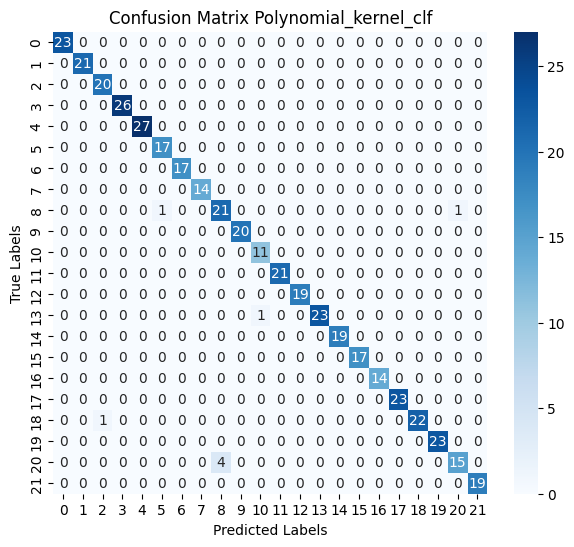

In [62]:
from sklearn import metrics


predicted_values = poly_kernel_svm_clf.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
mod.append('Polynomial_kernel_svmclf')
accuracy.append(x)
print("Polynomial_kernel_svmclf Accuracy is: ", x*100)

print(metrics.classification_report(Ytest,predicted_values))
cm = confusion_matrix(Ytest, predicted_values)

# Print the confusion matrix
print("Confusion Matrix:")

# Create a heatmap for the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Polynomial_kernel_clf")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [63]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = poly_kernel_svm_clf.predict(data)
print(prediction)

['coffee']


c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [64]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = poly_kernel_svm_clf.predict(data)
print(prediction)

['jute']


c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Decision Tree Classifier

In [65]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

with open("C:/Users/SUJAN ACHARYA/OneDrive/Documents/My_Codings/Python/Machine Learning/ML projects\Crop recommendation\crop.dot",'w') as f:
    export_graphviz(DecisionTree, 
                out_file = f,
                rounded = True, filled = True)

# convert a dot file to a png/pdf
from graphviz import Source

#dot_path = "C:/Users/SUJAN ACHARYA/OneDrive/Documents/My_Codings/Python/Machine Learning/ML projects/Crop recommendation/crop.dot"
#output = Source.from_file(dot_path, format = "png") # can change png to pdf
#output.view()


c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

DecisionTrees's Accuracy is:  86.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.61      1.00      0.75        20
    chickpea       1.00      0.96      0.98        26
     coconut       0.96      0.96      0.96        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.63      0.96      0.76        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.42      1.00      0.59        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

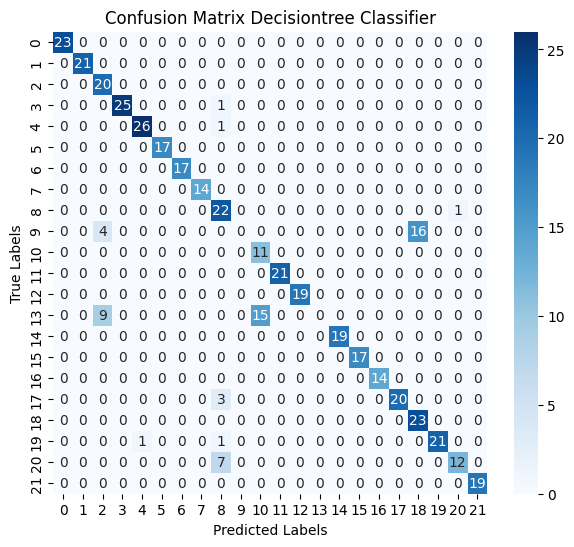

In [66]:
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
mod.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(metrics.classification_report(Ytest,predicted_values))

from sklearn.metrics import confusion_matrix

# Assuming you have already trained and predicted using Gaussian Naive Bayes

# Calculate the confusion matrix
cm = confusion_matrix(Ytest, predicted_values)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already computed the confusion matrix

# Create a heatmap for the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Decisiontree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Cross validation Scores

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTree, features, target,cv=5)
scores

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

# mean accuracy score 

In [68]:
mean_score = np.mean(scores)
mean_score

0.9140909090909091

# Gaussian NB

Naive Bayes Accuracy is:  99.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00    

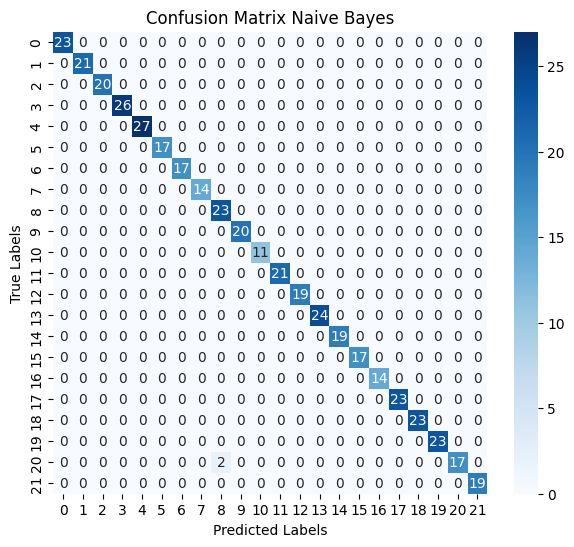

In [69]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain,Ytrain)
predicted_values = model.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
mod.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x*100)
print(metrics.classification_report(Ytest,predicted_values))

from sklearn.metrics import confusion_matrix

# Assuming you have already trained and predicted using Gaussian Naive Bayes

# Calculate the confusion matrix
cm = confusion_matrix(Ytest, predicted_values)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already computed the confusion matrix

# Create a heatmap for the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Cross validation scores

In [70]:
scores = cross_val_score(model, features, target,cv=5)
print(scores)

mean_score = np.mean(scores)
print(mean_score)

[0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
0.9950000000000001


In [71]:
import pickle

NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename,'wb')
pickle.dump(model,NB_Model_pkl)
NB_Model_pkl.close()

# Predicting

In [72]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = model.predict(data)
print(prediction)


['coffee']


c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# RandomForestClassifier

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

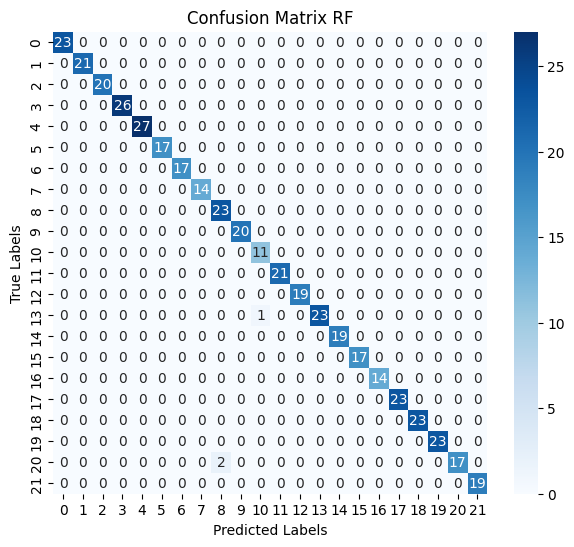

In [73]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
mod.append('RF')
print("RF's Accuracy is: ", x)

print(metrics.classification_report(Ytest,predicted_values))

from sklearn.metrics import confusion_matrix

# Assuming you have already trained and predicted using Gaussian Naive Bayes

# Calculate the confusion matrix
cm = confusion_matrix(Ytest, predicted_values)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already computed the confusion matrix

# Create a heatmap for the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix RF")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Cross validation scores

In [74]:
score = cross_val_score(RF,features,target,cv=5)
score
mean_score = np.mean(score)
print(mean_score)

0.9945454545454545


In [75]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# Accuracy Comparision

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

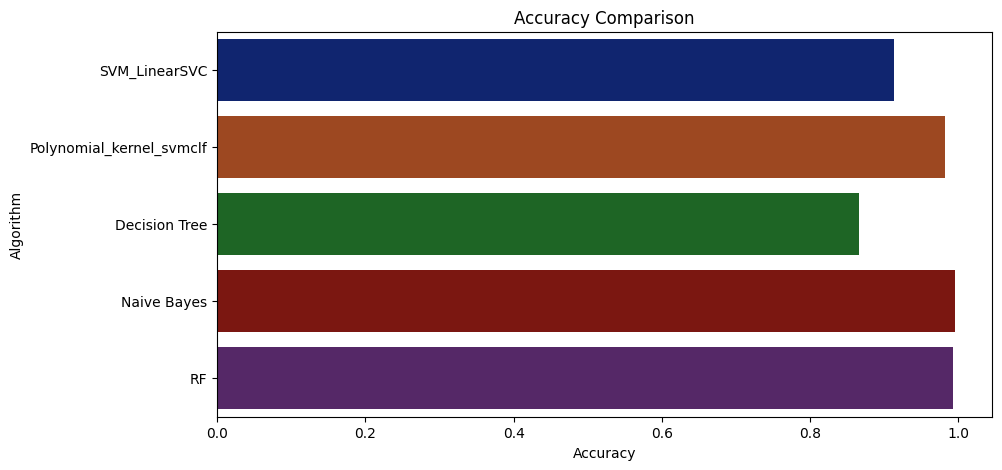

In [76]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy,y = mod,palette='dark')

In [77]:
accuracy_models = dict(zip(mod, accuracy))
for k, v in accuracy_models.items():
    print (k, '-->', v)

SVM_LinearSVC --> 0.9136363636363637
Polynomial_kernel_svmclf --> 0.9818181818181818
Decision Tree --> 0.865909090909091
Naive Bayes --> 0.9954545454545455
RF --> 0.9931818181818182


#  Predicting using NavieBayes model

In [78]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = model.predict(data)
print(prediction)

['coffee']


c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [80]:
data = np.array([[93,56,36,24.01,82.05,6.98,185.27]])
prediction = model.predict(data)
print(prediction)

['jute']


c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Voting Classifier

In [35]:
mod

['SVM_LinearSVC',
 'Polynomial_kernel_svmclf',
 'Decision Tree',
 'Naive Bayes',
 'RF']

In [41]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
 estimators=[('polynomial_svm', polynomial_svm_clf), ('DT', DecisionTree)],
 voting='hard')
voting_clf.fit(Xtrain, Ytrain)

c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('polynomial_svm',
                              Pipeline(steps=[('poly_features',
                                               PolynomialFeatures(degree=5)),
                                              ('svm_clf',
                                               LinearSVC(C=15,
                                                         loss='hinge'))])),
                             ('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     random_state=2))])

In [42]:
from sklearn.metrics import accuracy_score
for clf in (polynomial_svm_clf, DecisionTree,voting_clf):
    clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    print(clf.__class__.__name__, accuracy_score(Ytest, y_pred))

c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline 0.9159090909090909
DecisionTreeClassifier 0.865909090909091
VotingClassifier 0.8727272727272727


c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = voting_clf.predict(data)
print(prediction)

['jute']


c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [44]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = voting_clf.predict(data)
print(prediction)

['coffee']


c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\SUJAN ACHARYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
